ROC (Receiver Operating Characteristic) Curve:
The ROC curve is a graphical plot that shows the performance of a classification model at all classification thresholds. It plots True Positive Rate (Sensitivity) on the Y-axis against False Positive Rate (1 - Specificity) on the X-axis.

A model that performs well will have a curve closer to the top-left corner, indicating high sensitivity and low false positives.

The AUC (Area Under the Curve) value summarizes this performance higher AUC means better model discrimination between classes.

In [2]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, random_state=42, n_redundant=0)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [40]:
model_prob = model.predict_proba(X_test)[:,1]
model_dummy = [0 for i in range(0,len(model_prob))]

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score

print(f' The Area under the ROC curve {roc_auc_score(y_test, model_prob)}')
print(f' The Area under the ROC curve for Dummy model {roc_auc_score(y_test, model_dummy)}')

 The Area under the ROC curve 0.9480352062588904
 The Area under the ROC curve for Dummy model 0.5


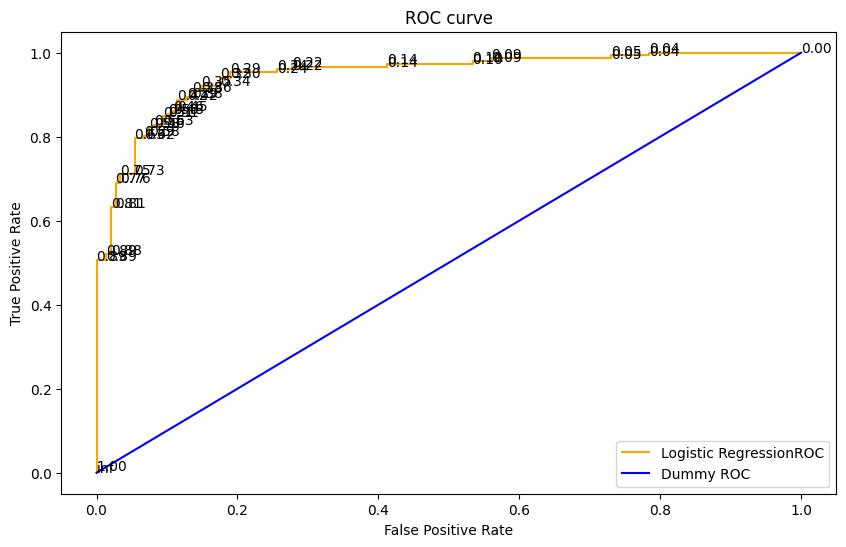

In [58]:
plt.figure(figsize=(10,6))


model_FPR, model_TPR, model_thresholds = roc_curve(y_test, model_prob)
dummy_FPR, dummy_TPR, dummy_thresholds = roc_curve(y_test, model_dummy)
import matplotlib.pyplot as plt
plt.plot(model_FPR, model_TPR, color='orange', label='Logistic RegressionROC')
plt.plot(dummy_FPR, dummy_TPR, color='blue', label='Dummy ROC')


for fpr, tpr, thresh in zip(model_FPR, model_TPR, model_thresholds):
    plt.annotate(f'{thresh:.2f}', (fpr, tpr))


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.show()   

In [59]:
dummy_FPR, dummy_TPR

(array([0., 1.]), array([0., 1.]))